In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from colorama import Fore, Style
from jupyterthemes import jtplot 
from joblib import dump
jtplot.style(theme="monokai", context="notebook", ticks=True)

In [2]:
df = pd.read_csv("bank-full.csv", delimiter=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
# Get all numeric columns 
numeric_type_fields = df.select_dtypes(exclude=["object"]).columns
print(Fore.YELLOW, "Numeric Values in ", Style.RESET_ALL, numeric_type_fields)

# Get all string columns
object_type_fields = df.select_dtypes(exclude=['int64']).columns
print(Fore.BLUE, "String values in ", Style.RESET_ALL, object_type_fields)

 Numeric Values in   Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')
 String values in   Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [6]:
# List all categorical values for the object columns
def get_categorical_info():
    colors = [Fore.YELLOW, Fore.BLUE, Fore.RED]

    for idx, cols in enumerate(object_type_fields):

        if idx >= 3 :
            idx = idx % 3

        print(colors[idx], f"{cols}", Style.RESET_ALL, f" --> {df[cols].unique()}")
    
get_categorical_info()

 job   --> ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown' 'mgmt'
 'retired' 'admin' 'admin.' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']
 marital   --> ['married' 'single' 'divorced']
 education   --> ['tertiary' 'secondary' 'unknown' 'primary']
 default   --> ['no' 'yes']
 housing   --> ['yes' 'no']
 loan   --> ['no' 'yes']
 contact   --> ['unknown' 'cellular' 'telephone']
 month   --> ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
 poutcome   --> ['unknown' 'failure' 'other' 'success']
 y   --> ['no' 'yes']


# Observations of Categorical Values:

* Except the `month` and `education` every other field are nominal data.
* The `job` field has similar categorical values which are named either differently or abbreviated such 'management' and 'mgmt', 'admin' and 'admin.'
* Since these data are in object format they need to be converted to numeric data for model training and others.

In [7]:
# Cleaning part 1
df["job"].loc[df['job'] == "admin."] = "admin"
df["job"].loc[df["job"] == "mgmt"] = "management"

get_categorical_info()

 job   --> ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
 marital   --> ['married' 'single' 'divorced']
 education   --> ['tertiary' 'secondary' 'unknown' 'primary']
 default   --> ['no' 'yes']
 housing   --> ['yes' 'no']
 loan   --> ['no' 'yes']
 contact   --> ['unknown' 'cellular' 'telephone']
 month   --> ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
 poutcome   --> ['unknown' 'failure' 'other' 'success']
 y   --> ['no' 'yes']


/home/adityam/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
df.loc[df["education"] == "unknown"]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
13,58,technician,married,unknown,no,71,yes,no,unknown,5,may,71,1,-1,0,unknown,no
16,45,admin,single,unknown,no,13,yes,no,unknown,5,may,98,1,-1,0,unknown,no
42,60,blue-collar,married,unknown,no,104,yes,no,unknown,5,may,22,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45129,46,technician,married,unknown,no,3308,no,no,cellular,27,oct,171,1,91,2,success,yes
45141,77,unknown,married,unknown,no,397,no,no,telephone,8,nov,207,1,185,3,success,no
45150,65,management,married,unknown,no,2352,no,no,cellular,8,nov,354,3,188,13,success,no
45158,34,student,single,unknown,no,2321,no,no,cellular,9,nov,600,2,99,5,failure,no


In [9]:
df.loc[(df["education"] == "unknown") & (df["job"] == "student")]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
203,35,student,single,unknown,no,298,yes,no,unknown,5,may,611,2,-1,0,unknown,no
1401,26,student,single,unknown,no,-41,yes,no,unknown,8,may,229,2,-1,0,unknown,no
2259,21,student,single,unknown,no,137,yes,no,unknown,12,may,198,3,-1,0,unknown,no
4268,21,student,single,unknown,no,210,yes,no,unknown,19,may,53,1,-1,0,unknown,no
4442,32,student,single,unknown,no,1583,yes,no,unknown,20,may,57,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44790,21,student,single,unknown,no,1506,no,no,cellular,14,sep,340,1,-1,0,unknown,yes
44804,32,student,single,unknown,no,0,no,no,unknown,15,sep,7,1,-1,0,unknown,no
44823,20,student,single,unknown,no,2785,no,no,cellular,16,sep,327,2,-1,0,unknown,yes
44870,20,student,single,unknown,no,179,no,no,cellular,23,sep,317,1,182,6,failure,no


In [10]:
# Encoding data
jobs = {"management":0, "technician" : 1, "entrepreneur": 2, "blue-collar": 3, 
       "unknown" : 4, "retired" : 5, "admin" : 6, "services" : 7, "self-employed" : 8,
       "unemployed" : 9, "housemaid" : 10, "student": 11} # Nominal field

marital = {"single" : 0, "married": 1, "divorced": 2} # Nominal field

educational = {"unknown":0, "primary" : 1, "secondary" : 2, "tertiary": 3} # Ordinal field

yes_no_type_fields = {"no" : 0, "yes" : 1}

contact = {"unknown" : 0, "cellular" : 1, "telephone" : 2} # Nominal field

month = {"jan":0, "feb":1, "mar":2, "apr":3, "may":4, "jun":5, "jul":6,
        "aug":7, "sep":8, "oct":9, "nov":10, "dec":11} # Ordinal field

poutcome = {"unknown":0, "failure":1, "other":2, "success": 3} # Nominal field


# Apply these encoding to the categorical fields

df["job"] = df["job"].apply(lambda x: jobs[x])
df["marital"] = df["marital"].apply(lambda x: marital[x])
df["education"] = df["education"].apply(lambda x: educational[x])
df["default"] = df["default"].apply(lambda x: yes_no_type_fields[x])
df["housing"] = df["housing"].apply(lambda x: yes_no_type_fields[x])
df["loan"] = df["loan"].apply(lambda x: yes_no_type_fields[x])
df["y"] = df["y"].apply(lambda x: yes_no_type_fields[x])
df["month"] = df["month"].apply(lambda x: month[x])
df["contact"] = df["contact"].apply(lambda x: contact[x])
df["poutcome"] = df["poutcome"].apply(lambda x: poutcome[x])

# Let's look at the DataFrame now after applying these encoding
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,1,3,0,2143,1,0,0,5,4,261,1,-1,0,0,0
1,44,1,0,2,0,29,1,0,0,5,4,151,1,-1,0,0,0
2,33,2,1,2,0,2,1,1,0,5,4,76,1,-1,0,0,0
3,47,3,1,0,0,1506,1,0,0,5,4,92,1,-1,0,0,0
4,33,4,0,0,0,1,0,0,0,5,4,198,1,-1,0,0,0


# Target Distribution

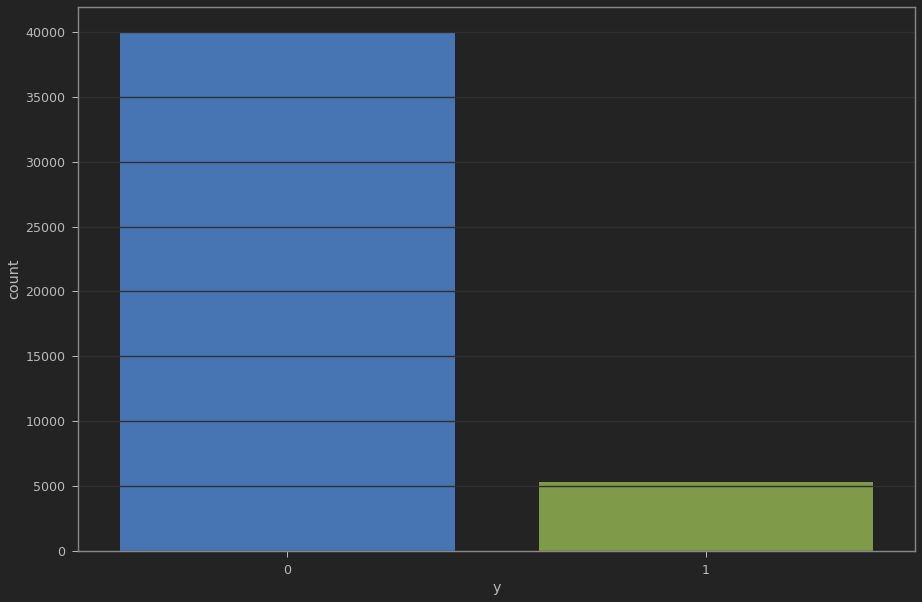

In [11]:
plt.figure(figsize=(15, 10))
sns.countplot(x="y", data=df)

# Outlier Analysis

For the Outlier Analysis I am applying the IQR rule the formula for which is 

$$
\begin{equation}
IQR := Q3 - Q1 \\
LB := Q1 - (1.5 \times IQR) \\
UB := Q3 + (1.5 \times IQR)
\end{equation}
$$

The Other workaround is to use Z-Scores whose formula is :

$$
\begin{equation}
Z := \frac{x - \mu}{\sigma}
\end{equation}
$$

**Note** : IQR is non-parameteric while z-score is parametric and Z-Score assumes that the data is a Normal Distribution

### Outliers in `age` field

In [12]:
q1_age = df["age"].quantile(0.25)
q3_age = df["age"].quantile(0.75)
iqr_age = q3_age - q1_age
lb_age = q1_age - (1.5 * iqr_age)
ub_age = q3_age + (1.5 * iqr_age)

print(f"Any values <{lb_age} : {df.loc[df['age'] < lb_age, 'age'].unique()}, len: {len(df.loc[df['age'] < lb_age, 'age'].unique())}")
print(f"Any values >{ub_age} : {df.loc[df['age'] > ub_age, 'age'].unique()}, len : {len(df.loc[df['age'] > ub_age, 'age'].unique())}")

Any values <10.5 : [], len: 0
Any values >70.5 : [83 75 72 71 76 85 90 82 73 74 78 80 94 79 77 86 95 81 89 84 87 92 93 88], len : 24


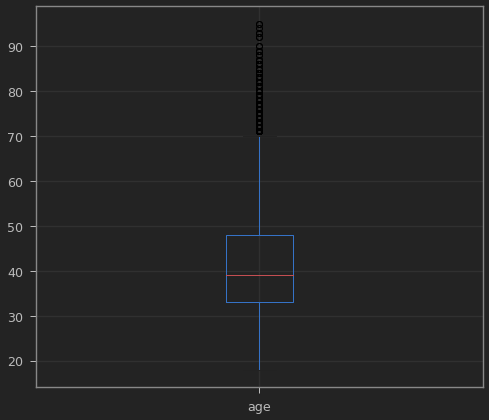

In [13]:
df.boxplot(column="age")

### Outliers in `balance` field

In [14]:
q1_balance = df["balance"].quantile(0.25)
q3_balance = df["balance"].quantile(0.75)
iqr_balance = q3_balance - q1_balance
lb_balance = q1_balance - (1.5 * iqr_balance)
ub_balance = q3_balance + (1.5 * iqr_balance)

print(f"Any values < {lb_balance} : {df.loc[df['balance'] < lb_balance, 'balance'].unique()}, len : {len(df.loc[df['balance'] < lb_balance])}")
print(f"Any values >{ub_balance} : {df.loc[df['balance'] > ub_balance, 'balance'].unique()}, len: {len(df.loc[df['balance'] > ub_balance])}")

Any values < -1962.0 : [-3313 -3372 -2049 -1968 -8019 -2093 -1965 -2282 -6847 -2082 -2827 -1980
 -2604 -2122 -2712 -3058 -4057], len : 17
Any values >3462.0 : [10635  6530 12223 ...  8205 14204 16353], len: 4712


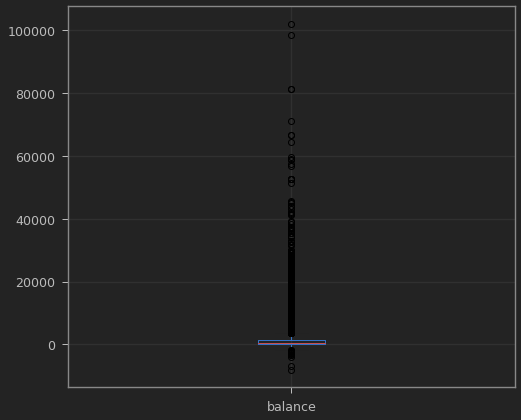

In [15]:
df.boxplot(column="balance")

### Outliers in `day` field

In [16]:
q1_day = df["day"].quantile(0.25)
q3_day = df["day"].quantile(0.75)
iqr_day = q3_day - q1_day
lb_day = q1_day - (1.5 * iqr_day)
ub_day = q3_day + (1.5 * iqr_day)
print(f"Any values <{lb_day}:{df.loc[df['day'] < lb_day, 'day'].unique()}, len:{len(df.loc[df['day'] < lb_day])}")
print(f"Any values >{ub_day}:{df.loc[df['day'] > ub_day, 'day'].unique()}, len:{len(df.loc[df['day'] > ub_day])}")

Any values <-11.5:[], len:0
Any values >40.5:[], len:0


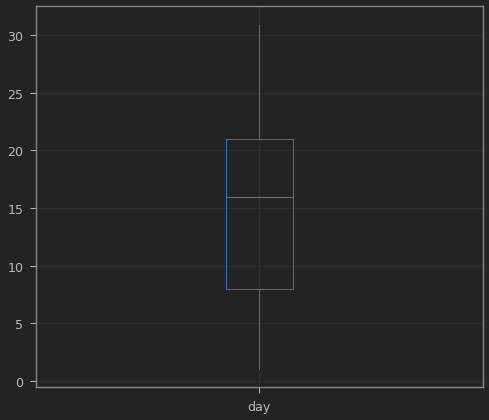

In [17]:
df.boxplot(column="day")

### Outliers in `duration`

In [18]:
q1_duration = df["duration"].quantile(0.25)
q3_duration = df["duration"].quantile(0.75)

iqr_duration = q3_duration - q1_duration
lb_duration = q1_duration - (1.5 * iqr_duration)
ub_duration = q3_duration + (1.5 * iqr_duration)

print(f"Any values <{lb_duration}:{df.loc[df['duration'] < lb_duration, 'duration'].unique()}, len : {len(df.loc[df['duration'] < lb_duration, 'duration'].unique())}")
print(f"Any values >{ub_duration}:{df.loc[df['duration'] > ub_duration, 'duration'].unique()}, len : {len(df.loc[df['duration'] > ub_duration, 'duration'].unique())}")

Any values <-221.0:[], len : 0
Any values >643.0:[1666 1492  787 1778  812 1042 1467 1389  849  677 2033  673 1056  717
  683 1077 1419  730  746  702  714  962  742  669  680  808  652 1201
 1030  769  744  765 1623  678  699 1677  918 1297 1906  703  802  684
  739 1597 1529  720  852  923  953  732 1521  800 1138  786  799  866
 1581  650 1101  912  690 1062  688 2177  764 1273 1574  984 1689  697
  944 1102  943  813 1040 1084  693 1119 1120  784  665  712 1007  667
  982  756  807 2087  956  985  672 1187  826  847  659  772  929  710
  705 2462  825  646  653 1028  654 1087 1692 2016 1054 1170 1713  663
 1080 1461  750 1178  752  878  834 1534  836 1002  757 1147  820  788
  832 1495  891 1083 1266  793 1727 1875  907  723  704 1346 1386 3366
 1000 2231 1167  806  766 1015  768 1001  845  853  916  753  708  805
  901  851 1052  647  771 1106  945  816 1721 1032  735  942  824 1553
 1328  686 1125  858  760  869  833  930  829  749  850  977  927  762
 1044  668  902  738 2241 11

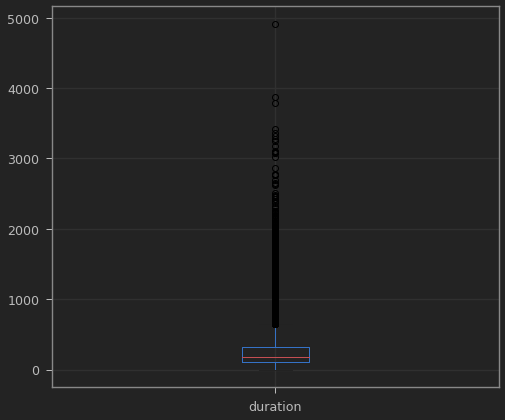

In [19]:
df.boxplot(column="duration")

### Outliers in `campaign`

In [20]:
q1_campaign = df["campaign"].quantile(0.25)
q3_campaign = df["campaign"].quantile(0.75)
iqr_campaign = q3_campaign - q1_campaign

lb_campaign = q1_campaign - (1.5 * iqr_campaign)
ub_campaign = q3_campaign + (1.5 * iqr_campaign)

print(f"Any values <{lb_campaign} : {df.loc[df['campaign'] < lb_campaign, 'campaign'].unique()}, len:{len(df.loc[df['campaign'] < lb_campaign, 'campaign'].unique())}")
print(f"Any values >{ub_campaign} : {df.loc[df['campaign'] > ub_campaign, 'campaign'].unique()}, len:{len(df.loc[df['campaign'] > ub_campaign, 'campaign'].unique())}")


Any values <-2.0 : [], len:0
Any values >6.0 : [ 7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21 43 51 63 41 26 28
 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44], len:42


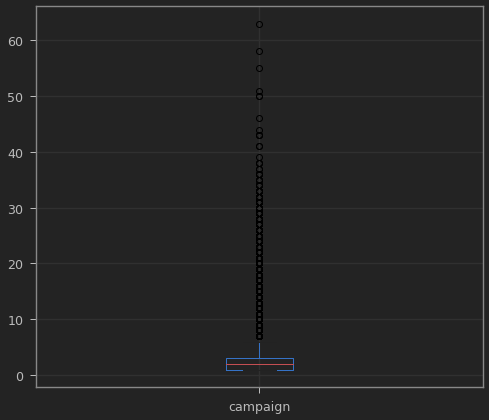

In [21]:
df.boxplot(column="campaign")

### Outliers in `pdays`

In [22]:
q1_pdays = df["pdays"].quantile(0.25)
q3_pdays = df["pdays"].quantile(0.75)

iqr_pdays = q3_pdays - q1_pdays
lb_pdays = q1_pdays - (1.5 * iqr_pdays)
ub_pdays = q3_pdays + (1.5 * iqr_pdays)

print(f"Any values < {lb_pdays} : {df.loc[df['pdays'] < lb_pdays, 'pdays'].unique()}, len:{len(df.loc[df['pdays'] < lb_pdays, 'pdays'].unique())}")
print(f"Any values > {ub_pdays} : {df.loc[df['pdays'] > ub_pdays, 'pdays'].unique()}, len:{len(df.loc[df['pdays'] > ub_pdays, 'pdays'].unique())}")

Any values < -1.0 : [], len:0
Any values > -1.0 : [151 166  91  86 143 147  89 140 176 101 174 170 167 195 165 129 188 196
 172 118 119 104 171 117 164 132 131 123 159 186 111 115 116 173 178 110
 152  96 103 150 175 193 181 185 154 145 138 126 180 109 158 168  97 182
 127 130 194 125 105 102  26 179  28 183 155 112 120 137 124 187 190 113
 162 134 169 189   8 144 191 184 177   5  99 133  93  92  10 100 156 198
 106 153 146 128   7 121 160 107  90  27 197 136 139 122 157 149 135  30
 114  98 192 163  34  95 141  31 199  94 108  29 268 247 253 226 244 239
 245 204 231 238 258 230 254 265  71 223 246 250 266 240 205 261 259 241
 260 234 251 225 161 237 262 248 255 220 227 206 224 249 235 228 263   2
 270 232 252 207 200 269 233 256 273 272 242 264 208 214 222 271 203 221
 202 216 201 257 229 210 217  75 213  73  76 267 211 215  77 236  82   6
 209 274   1 243 212 275  80 276   9 279  12 280  88 277  85  84 219  24
  21 282  41 294  49 329 307 303 331 308 300  64 314 287 330 332 302 323
 

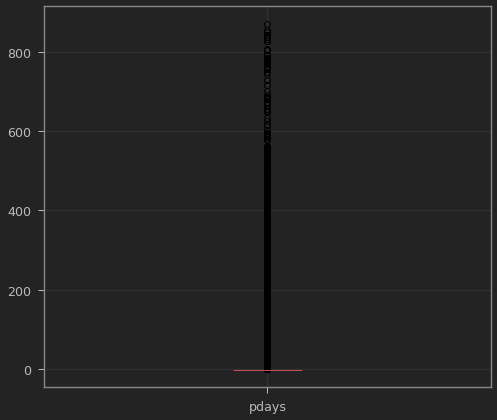

In [23]:
df.boxplot(column="pdays")

### Outliers in `previous`

In [24]:
q1_previous = df["previous"].quantile(0.25)
q3_previous = df["previous"].quantile(0.75)

iqr_previous = q3_previous - q1_previous
lb_previous = q1_previous - (1.5 * iqr_previous)
ub_previous = q3_previous + (1.5 * iqr_previous)

print(f"Any values < {lb_previous} : {df.loc[df['previous'] < lb_previous, 'previous'].unique()}, len: {len(df.loc[df['previous'] < lb_previous, 'previous'].unique())}")
print(f"Any values > {ub_previous} : {df.loc[df['previous'] > ub_previous, 'previous'].unique()}, len: {len(df.loc[df['previous'] > ub_previous, 'previous'].unique())}")

Any values < 0.0 : [], len: 0
Any values > 0.0 : [  3   1   4   2  11  16   6   5  10  12   7  18   9  21   8  14  15  26
  37  13  25  20  27  17  23  38  29  24  51 275  22  19  30  58  28  32
  40  55  35  41], len: 40


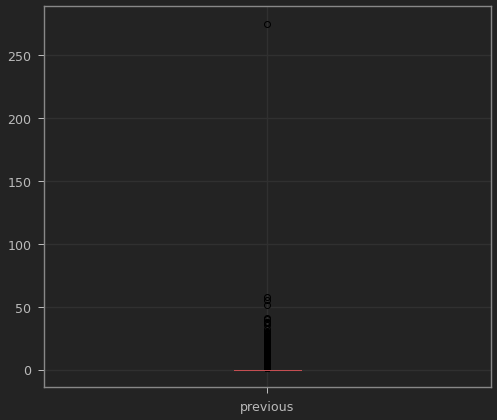

In [25]:
df.boxplot(column="previous")

# Observations

* The `age` field has an upper bound of 70 years.

* Negative amount are present in `balance` field which is quite suspicious as it denotes the annual income of an individual in euros.

* The main reason of `balance` field having huge number of outliers is because of the fact that different people as per job and education, earns money on different scale.

* The `previous` and `pdays` have IQR = 0 which suggest that there is almost zero-variance in the data in `previous` and `pdays`


# Standarization

In [26]:
df.loc[df["balance"] < 0, "balance"] = 0
X = df.drop('y', axis=1).values
y = df['y'].values

print(f"Shape of X : {X.shape}")
print(f"Shape of Target data : {y.shape}")

Shape of X : (45211, 16)
Shape of Target data : (45211,)


In [27]:
std_scaler = StandardScaler()
X_std = std_scaler.fit_transform(X)
print(f"Shape of X data : {X_std.shape}")

Shape of X data : (45211, 16)


# Split the Data into Train and Validation Sets

In [36]:
from sklearn.model_selection import train_test_split
Xtrain, Xval, Ytrain, Yval = train_test_split(X_std, y, random_state=0, stratify=y)

# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)
logreg.fit(Xtrain, Ytrain)

print(f"Training score for Logistic Regression : {logreg.score(Xtrain, Ytrain) * 100.}")
print(f"Validation score for Logistic Regression : {logreg.score(Xval, Yval) * 100.}")

Training score for Logistic Regression : 89.93157956824348
Validation score for Logistic Regression : 89.76377952755905


# Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(Xtrain, Ytrain)

print(f"Training Score for Decision Tree : {tree.score(Xtrain, Ytrain) * 100.}")
print(f"Validation Score for Decision Tree : {tree.score(Xval, Yval) * 100.}")

Training Score for Decision Tree : 100.0
Validation Score for Decision Tree : 87.55197735114571


# Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(Xtrain, Ytrain)

print(f"Training Score for Random Forest : {rf.score(Xtrain, Ytrain) * 100.}")
print(f"Validation Score for Random Forest : {rf.score(Xval, Yval) * 100.}")

Training Score for Random Forest : 100.0
Validation Score for Random Forest : 90.47155622401132


# XGBoost

In [40]:
from xgboost import XGBClassifier

xg = XGBClassifier(random_state=0)

xg.fit(Xtrain, Ytrain)

print(f"Training Score for XGBoost : {xg.score(Xtrain, Ytrain) * 100.}")
print(f"Validation Score for XGBoost : {xg.score(Xval, Yval) * 100}")

Training Score for XGBoost : 95.67063819747553
Validation Score for XGBoost : 90.97584712023357


# Neural Network

In [41]:
import torch
import torch.nn as nn

In [42]:
tensorXtrain = torch.from_numpy(Xtrain).float()
tensorXval = torch.from_numpy(Xval).float()

tensorYtrain = torch.from_numpy(Ytrain).float()
tensorYval = torch.from_numpy(Yval).float()

In [43]:
# Create PyTorch Dataset
train_dataset = torch.utils.data.TensorDataset(tensorXtrain, tensorYtrain)
val_dataset = torch.utils.data.TensorDataset(tensorXval, tensorYval)

In [44]:
class ANN(nn.Module):
    
    def __init__(self, n_features, n_classes=1):
        
        super(ANN, self).__init__()
        self.fc = nn.Sequential(
                nn.Linear(n_features, 20),
                nn.ReLU(),
                nn.Linear(20, 10),
                nn.ReLU(),
                nn.Linear(10, n_classes))
        
    def forward(self, X):
        out = self.fc(X)
        return out

In [45]:
# Build the model
n_features = X.shape[1]
n_classes = 1
model = ANN(n_features, n_classes)

In [46]:
# Build the model losses and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [47]:
# Create the train and val iterator
train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
val_iter = torch.utils.data.DataLoader(val_dataset, batch_size=128, shuffle=False)

In [48]:
def batch_gd(model, criterion, optimizer, train_iter, val_iter, epochs=20):
    
    train_losses = np.zeros(epochs)
    val_losses = np.zeros(epochs)
    
    train_accs = np.zeros(epochs)
    val_accs = np.zeros(epochs)
    
    for epoch in range(epochs):
        
        train_loss = []
        val_loss = []
        
        train_acc = []
        val_acc = []
        
        for inputs, targets in train_iter:
            
            # Shape the target for BCEWithLogitsLoss 
            targets = targets.view(-1, 1)
            
            # Zero the optimizer-gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            # Backward pass and Optimization
            loss.backward()
            optimizer.step()
            
            # Calculate the acc
            acc = np.mean(targets.numpy() == (outputs.detach().numpy() > 0))
            
            # Track the loss and acc
            train_loss.append(loss.item())
            train_acc.append(acc)
            
        
        for inputs, targets in val_iter:
            
            # Shape the target for BCEWithLogitsLoss
            targets = targets.view(-1, 1)
            
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            # Calculate the acc
            acc = np.mean(targets.numpy() == (outputs.detach().numpy() > 0))
            
            # Track the loss and acc
            val_loss.append(loss.item())
            val_acc.append(acc)
            
        
        train_loss = np.mean(train_loss)
        val_loss = np.mean(val_loss)
        
        train_acc = np.mean(train_acc)
        val_acc = np.mean(val_acc)
        
        train_losses[epoch] = train_loss
        val_losses[epoch] = val_loss
        
        train_accs[epoch] = train_acc
        val_accs[epoch] = val_acc
        
        print(f"Epoch : {epoch+1}/{epochs} | Train Losses : {train_loss} | Train Acc : {train_acc} | Val Losses : {val_loss} | Val Acc : {val_acc}")
    
    
    return train_losses, val_losses, train_accs, val_accs
            

In [49]:
train_losses, val_losses, train_accs, val_accs = batch_gd(model, criterion, optimizer, train_iter, val_iter, epochs=200)

Epoch : 1/200 | Train Losses : 0.37130401713668176 | Train Acc : 0.884020209824333 | Val Losses : 0.2590739926260509 | Val Acc : 0.8908770887352349
Epoch : 2/200 | Train Losses : 0.24685458664624196 | Train Acc : 0.8964551480156149 | Val Losses : 0.24418293944235597 | Val Acc : 0.8980121002592912
Epoch : 3/200 | Train Losses : 0.23937821233609938 | Train Acc : 0.8980613614183474 | Val Losses : 0.2405729226851731 | Val Acc : 0.898187662057044
Epoch : 4/200 | Train Losses : 0.23615969503825565 | Train Acc : 0.899170461938842 | Val Losses : 0.23845106296324997 | Val Acc : 0.89730985306828
Epoch : 5/200 | Train Losses : 0.23418429111534694 | Train Acc : 0.9003466574495771 | Val Losses : 0.2373561788810773 | Val Acc : 0.8980998811581676
Epoch : 6/200 | Train Losses : 0.23245716505455521 | Train Acc : 0.901024723487313 | Val Losses : 0.23687545637066446 | Val Acc : 0.8983632238547968
Epoch : 7/200 | Train Losses : 0.2312275252533409 | Train Acc : 0.901584864996747 | Val Losses : 0.2356054233

Epoch : 56/200 | Train Losses : 0.20963168554710893 | Train Acc : 0.9062225520494469 | Val Losses : 0.21978154276194198 | Val Acc : 0.903479274704696
Epoch : 57/200 | Train Losses : 0.20928071787897146 | Train Acc : 0.9065732758620689 | Val Losses : 0.2201723124873772 | Val Acc : 0.9030403702103139
Epoch : 58/200 | Train Losses : 0.2090459961092697 | Train Acc : 0.9066617192582953 | Val Losses : 0.22082750415534116 | Val Acc : 0.9037426174013252
Epoch : 59/200 | Train Losses : 0.20900230039403123 | Train Acc : 0.9068416558230318 | Val Losses : 0.22062392365396694 | Val Acc : 0.9035670556035724
Epoch : 60/200 | Train Losses : 0.20887550708820235 | Train Acc : 0.9064848324658424 | Val Losses : 0.22034159085054075 | Val Acc : 0.9030156114952463
Epoch : 61/200 | Train Losses : 0.20818924735177238 | Train Acc : 0.9067765940143137 | Val Losses : 0.21968895916858416 | Val Acc : 0.9019869994237971
Epoch : 62/200 | Train Losses : 0.20847007823440264 | Train Acc : 0.9064523015614835 | Val Losses

Epoch : 111/200 | Train Losses : 0.20104118779582797 | Train Acc : 0.9085393623942746 | Val Losses : 0.2180308907219533 | Val Acc : 0.9018497010947853
Epoch : 112/200 | Train Losses : 0.20098283841924847 | Train Acc : 0.908627805790501 | Val Losses : 0.21668572305293565 | Val Acc : 0.9028152909824259
Epoch : 113/200 | Train Losses : 0.2009744939939031 | Train Acc : 0.909338402732596 | Val Losses : 0.21682129063633052 | Val Acc : 0.9022886055891673
Epoch : 114/200 | Train Losses : 0.20072549106377477 | Train Acc : 0.9090415582303187 | Val Losses : 0.2161324792698528 | Val Acc : 0.9034297572745607
Epoch : 115/200 | Train Losses : 0.20056628174376936 | Train Acc : 0.909347552049447 | Val Losses : 0.2162342079904642 | Val Acc : 0.901761920195909
Epoch : 116/200 | Train Losses : 0.20049515824835257 | Train Acc : 0.9093089216005205 | Val Losses : 0.216358770982603 | Val Acc : 0.9036053190723135
Epoch : 117/200 | Train Losses : 0.20029861651501565 | Train Acc : 0.9092591086532205 | Val Losses

Epoch : 166/200 | Train Losses : 0.19584912002648946 | Train Acc : 0.9112699251789199 | Val Losses : 0.21551427638597703 | Val Acc : 0.9036053190723135
Epoch : 167/200 | Train Losses : 0.1959613891423873 | Train Acc : 0.9121838402732595 | Val Losses : 0.216981824110733 | Val Acc : 0.9024641673869201
Epoch : 168/200 | Train Losses : 0.19625102090385724 | Train Acc : 0.9114132644762524 | Val Losses : 0.21482132065497087 | Val Acc : 0.9036053190723135
Epoch : 169/200 | Train Losses : 0.19607383949014376 | Train Acc : 0.9112872072218607 | Val Losses : 0.21542981719033102 | Val Acc : 0.9032541954768079
Epoch : 170/200 | Train Losses : 0.19610539059031684 | Train Acc : 0.9118920787247885 | Val Losses : 0.21436212655533565 | Val Acc : 0.9022886055891673
Epoch : 171/200 | Train Losses : 0.19605320877624008 | Train Acc : 0.9115677862719583 | Val Losses : 0.21534726006931135 | Val Acc : 0.9036930999711899
Epoch : 172/200 | Train Losses : 0.19580462704289633 | Train Acc : 0.91150272446324 | Val L

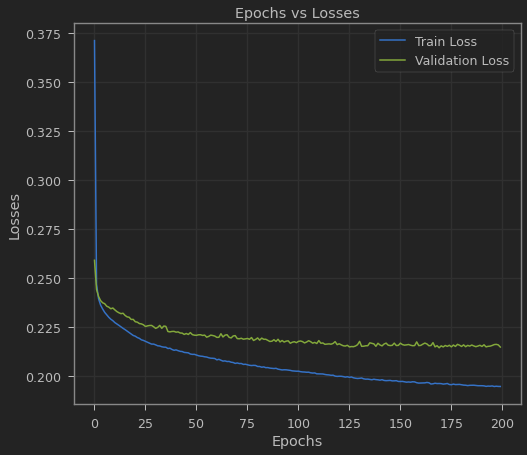

In [50]:
# Plot the epochs vs losses
plt.title("Epochs vs Losses")
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.legend()
plt.show()

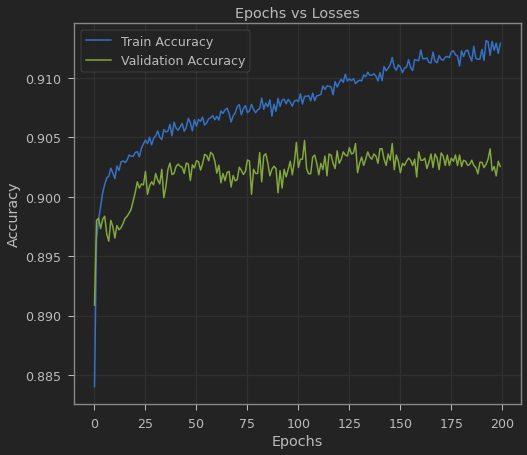

In [51]:
# Plot the epochs vs losses
plt.title("Epochs vs Losses")
plt.plot(train_accs, label="Train Accuracy")
plt.plot(val_accs, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [58]:
def get_accuracy(model, loader):
    
    acc = []
    
    for inputs, targets in loader:
        
        targets = targets.view(-1, 1)
        
        outputs = model(inputs)
        
        predictions = (outputs.detach().numpy() > 0)
        
        acc.append(np.mean(targets.detach().numpy() == predictions))
        
    return np.mean(acc) * 100

In [59]:
print(f"Training Accuracy of ANN : {get_accuracy(model, train_iter)}")
print(f"Validation Accuracy of ANN : {get_accuracy(model, val_iter)}")

Training Accuracy of ANN : 91.35806359791803
Validation Accuracy of ANN : 90.25519482857966


# Accuracy Comparison of ANN with Other models

| MODEL               | TRAIN ACC         | VAL ACC           |
|---------------------|-------------------|-------------------|
| Logistic Regression | 89.93157956824348 | 89.76377952755905 |
| Decision Tree       | 100.0             | 87.55197735114571 |
| Random Forest       | 100.0             | 90.47155622401132 |
| XGBoost             | 95.67063819747553 | 90.97584712023357 |
| ANN                 | 91.35806359791803 | 90.25519482857966 |



* The above table shows that XGBoost is the perfect for our example.
* The accuracy of prediction of Logistic Regression Model is quite similar to that of Neural Networks
* Both Decision Tree and Random Forest shows signs of overfitting.

In [62]:
dump(std_scaler,"./MODEL_DATA/std.bin",compress=True)
dump(xg,"./MODEL_DATA/model.dat")

['./MODEL_DATA/model.dat']